In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [2]:
latexify(width_scale_factor=1, fig_height=1.5)

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
def softmax(a):
    e = jnp.exp((1.0 * jnp.array(a)))
    return e / jnp.sum(e)

In [5]:
def make_graph(T, a, save_name, fig=None, axs=None):
    ind = jnp.arange(1, len(a) + 1)

    for i in range(len(T)):
        plt.subplot(1, len(T), i + 1)
        plt.bar(ind, softmax(a / T[i]))
        plt.title("T = %d" % T[i])
        plt.ylim(0, 1)
        ax = plt.gca()
        ax.set_xticklabels([])

    if len(save_name) > 0:
        savefig(save_name)
    plt.tight_layout()

/home/tensorboy/dev/env/lib/python3.8/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


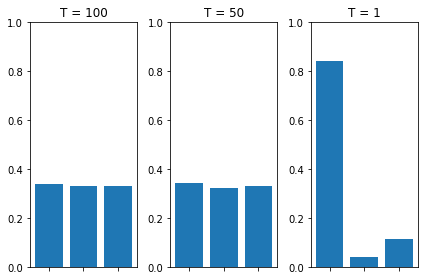

In [6]:
T = [100, 50, 1]
a = jnp.array([3, 0, 1])

make_graph(T, a, "softmax_T")

### Interactive figure for softmax distribution

In [14]:
from ipywidgets import interact


@interact(T=(1, 100))
def generate_interactinve_graph(T):
    a = jnp.array([3, 0, 1])
    make_graph([T], a, "")

interactive(children=(IntSlider(value=50, description='T', min=1), Output()), _dom_classes=('widget-interact',…